<a href="https://colab.research.google.com/github/shoaibanwar13/ASMA/blob/master/Isolation_and_DBCN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [103]:
df=pd.read_csv('/content/parsed_data.csv')

Step 1: Load the Dataset
Load the ARUBA CASAS dataset containing sensor data such as motion and door sensors.



In [108]:
df.rename(columns={
    'Timestamp': 'timestamp',
    'ID': 'sensor_id',
    'Value': 'sensor_type',
    'Extra': 'activity',

}, inplace=True)

# Display the first few rows of the updated dataset
print(df.head())

                    timestamp sensor_id sensor_type        activity  \
0  2010-11-04 00:03:50.209589      M003          ON  Sleeping begin   
1  2010-11-04 00:03:57.399391      M003         OFF             NaN   
2  2010-11-04 00:15:08.984841      T002        21.5             NaN   
3  2010-11-04 00:30:19.185547      T003          21             NaN   
4  2010-11-04 00:30:19.385336      T004          21             NaN   

  activity_Label  
0          Other  
1          Other  
2          Other  
3          Other  
4          Other  


 We Focus on relevant columns: timestamp, sensor_id, sensor_type, and activity.
But our dataset contain these:
Timestamp,ID ,Value and Extra
 columns then we rename in this sequence timestamp, sensor_id, sensor_type, and activity.

In [109]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

Preprocess the Data:Now Convert timestamp to datetime format to handle time-based operations.


In [110]:

df.set_index('timestamp', inplace=True)

Sort the dataset by timestamp to maintain chronological order.

In [111]:
# Filter out rows where sensor_type is 'temperature'
df = df[df['sensor_type'] != 'temperature']

Filter out irrelevant data, such as temperature readings, which have low correlation with the activities being monitored.

In [112]:
# Now you can resample the data
partitioned_df = df.resample('30S').size().reset_index(name='count')

# Optional: Including sensor types and their counts per window
sensor_counts = df.groupby([pd.Grouper(freq='30S'), 'sensor_type']).size().unstack(fill_value=0).reset_index()


Partition the dataset into 30-second time windows, counting the number of times each sensor is activated within each window and


In [113]:
df_filtered = df[df['sensor_type'] != 'temperature']

# Resample the data into 30-second time windows and count activations for each sensor
sensor_counts = df_filtered.groupby([pd.Grouper(freq='30S'), 'sensor_type']).size().unstack(fill_value=0).reset_index()

# Display the result
print(sensor_counts)

sensor_type           timestamp  16  16.5  17  17.5  18  18.5  180  19  19.5  \
0           2010-11-04 00:03:30   0     0   0     0   0     0    0   0     0   
1           2010-11-04 00:15:00   0     0   0     0   0     0    0   0     0   
2           2010-11-04 00:30:00   0     0   0     0   0     0    0   0     0   
3           2010-11-04 00:35:00   0     0   0     0   0     0    0   0     0   
4           2010-11-04 00:40:00   0     0   0     0   0     0    0   0     0   
...                         ...  ..   ...  ..   ...  ..   ...  ...  ..   ...   
216753      2011-06-11 23:37:30   0     0   0     0   0     0    0   0     0   
216754      2011-06-11 23:42:30   0     0   0     0   0     0    0   0     0   
216755      2011-06-11 23:48:00   0     0   0     0   0     0    0   0     0   
216756      2011-06-11 23:53:00   0     0   0     0   0     0    0   0     0   
216757      2011-06-11 23:58:00   0     0   0     0   0     0    0   0     0   

sensor_type  ...  ONM009  ONM024  ONM02

  Partitioned the sequence of sensor events into 30-second time windows.
  Identified a low correlation between temperature readings and user activities; decided to discard temperature data.

In [114]:
sensor_counts.rename_axis(None, axis=1, inplace=True)

# Display the first few rows of the result to verify
print(sensor_counts.head())

# Optionally, save the result to a CSV file for further analysis
sensor_counts.to_csv('sensor_counts_by_30s_window.csv', index=False)

            timestamp  16  16.5  17  17.5  18  18.5  180  19  19.5  ...  \
0 2010-11-04 00:03:30   0     0   0     0   0     0    0   0     0  ...   
1 2010-11-04 00:15:00   0     0   0     0   0     0    0   0     0  ...   
2 2010-11-04 00:30:00   0     0   0     0   0     0    0   0     0  ...   
3 2010-11-04 00:35:00   0     0   0     0   0     0    0   0     0  ...   
4 2010-11-04 00:40:00   0     0   0     0   0     0    0   0     0  ...   

   ONM009  ONM024  ONM026  ONc  ONc5  ONc5c  ONcc  OPEN  OPENc  OcFF  
0       0       0       0    0     0      0     0     0      0     0  
1       0       0       0    0     0      0     0     0      0     0  
2       0       0       0    0     0      0     0     0      0     0  
3       0       0       0    0     0      0     0     0      0     0  
4       0       0       0    0     0      0     0     0      0     0  

[5 rows x 92 columns]


In [115]:

print("DataFrame index:", df.index.name)

# If 'timestamp' is set as the index, reset it
if df.index.name == 'timestamp':
    df = df.reset_index()
    print("Index reset. 'timestamp' is now a column.")

# Verify if 'timestamp' is now a column
print("Columns in DataFrame:", df.columns.tolist())

# Check the first few rows to confirm
print(df.head())


DataFrame index: timestamp
Index reset. 'timestamp' is now a column.
Columns in DataFrame: ['timestamp', 'sensor_id', 'sensor_type', 'activity', 'activity_Label']
                   timestamp sensor_id sensor_type        activity  \
0 2010-11-04 00:03:50.209589      M003          ON  Sleeping begin   
1 2010-11-04 00:03:57.399391      M003         OFF             NaN   
2 2010-11-04 00:15:08.984841      T002        21.5             NaN   
3 2010-11-04 00:30:19.185547      T003          21             NaN   
4 2010-11-04 00:30:19.385336      T004          21             NaN   

  activity_Label  
0          Other  
1          Other  
2          Other  
3          Other  
4          Other  


  Now we Counted the number of activations for each sensor within each time window.


In [116]:

known_activities = [
    'Sleeping begin', 'Sleeping end', 'Bed_to_Toilet begin', 'Bed_to_Toilet end',
    'Meal_Preparation begin', 'Meal_Preparation end', 'Relax begin', 'Relax end',
    'Housekeeping begin', 'Housekeeping end', 'Eating begin', 'Eating end',
    'Wash_Dishes begin', 'Wash_Dishes end', 'Leave_Home begin', 'Leave_Home end',
    'Enter_Home begin', 'Enter_Home end', 'Work begin', 'Work end',
    'Respirate begin', 'Respirate end'
]

# Initialize activity_Label with 'Other'
df['activity_Label'] = 'Other'

# Identify indices for relevant events
leave_home_end_indices = df[df['activity'] == 'Leave_Home end'].index
enter_home_begin_indices = df[df['activity'] == 'Enter_Home begin'].index

# Iterate through indices and mark 'Outside' periods
for leave_idx in leave_home_end_indices:
    # Find the first 'Enter_Home begin' index after 'Leave_Home end'
    following_enter_idx = enter_home_begin_indices[enter_home_begin_indices > leave_idx]
    if not following_enter_idx.empty:
        enter_idx = following_enter_idx[0]
        # Ensure the indices are within bounds and update the activity_Label column
        if leave_idx + 1 < enter_idx:
            df.loc[(leave_idx + 1):(enter_idx - 1), 'activity_Label'] = 'Outside'

# Update known activities in 'activity_Label'
df.loc[df['activity'].isin(known_activities), 'activity_Label'] = df['activity']

# Display the updated DataFrame
print(df)


                         timestamp sensor_id sensor_type        activity  \
0       2010-11-04 00:03:50.209589      M003          ON  Sleeping begin   
1       2010-11-04 00:03:57.399391      M003         OFF             NaN   
2       2010-11-04 00:15:08.984841      T002        21.5             NaN   
3       2010-11-04 00:30:19.185547      T003          21             NaN   
4       2010-11-04 00:30:19.385336      T004          21             NaN   
...                            ...       ...         ...             ...   
1719553 2011-06-11 23:42:59.285070      T002        25.5             NaN   
1719554 2011-06-11 23:48:02.888409      T001        23.5             NaN   
1719555 2011-06-11 23:48:02.988798      T002          25             NaN   
1719556 2011-06-11 23:53:06.429200      T002        25.5             NaN   
1719557 2011-06-11 23:58:10.004834      T002          25    Sleeping end   

         activity_Label  
0        Sleeping begin  
1                 Other  
2        

In [119]:
extra_values = df['activity_Label'].dropna().unique()

print(extra_values.tolist())

['Sleeping begin', 'Other', 'Sleeping end', 'Bed_to_Toilet begin', 'Bed_to_Toilet end', 'Meal_Preparation begin', 'Meal_Preparation end', 'Relax begin', 'Relax end', 'Housekeeping begin', 'Housekeeping end', 'Eating begin', 'Eating end', 'Wash_Dishes begin', 'Wash_Dishes end', 'Leave_Home begin', 'Leave_Home end', 'Outside', 'Enter_Home begin', 'Enter_Home end', 'Work begin', 'Work end', 'Respirate begin', 'Respirate end']


The Aruba dataset includes eleven Activities of Daily Living (ADLs):
Bed to Toilet,
Eating,
Enter Home,
Housekeeping,
Leave Home,
Meal Preparation,
Relax,
Respiration (Respirate1),
Sleeping,
Wash Dishes,
Work.We added these activity to our dataset.
 Added a new activity, "Outside," to account for periods when the user is not at home (i.e., between "Leave Home" and "Enter Home").
Added another activity, "Other," which includes all sensor events that do not match any known activities.


In [120]:
# Extract hour of the day from the timestamp
df['hour_of_day'] = df['timestamp'].dt.hour

# Define function to categorize day into periods
def get_day_period(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

# Apply the function to create the 'day_period' feature
df['day_period'] = df['hour_of_day'].apply(get_day_period)


# Display the first few rows to verify
print(df[['timestamp', 'hour_of_day', 'day_period']].head())

                   timestamp  hour_of_day day_period
0 2010-11-04 00:03:50.209589            0      night
1 2010-11-04 00:03:57.399391            0      night
2 2010-11-04 00:15:08.984841            0      night
3 2010-11-04 00:30:19.185547            0      night
4 2010-11-04 00:30:19.385336            0      night


Step 3: Feature Extraction



**Temporal Features:**

**hour_of_day:**
Helps understand time-based patterns in user behavior. Certain activities (e.g., Sleeping, Eating) are more likely to occur at specific hours, we  making this feature crucial for contextual understanding.

**day_period: **Divides the day into four periods (morning, afternoon, evening, night) to capture activity patterns associated with different times of the day, which is essential for distinguishing between normal and abnormal behaviors.


In [121]:
df.set_index('timestamp', inplace=True)
resampled_df = df.resample('30S').agg({
    'sensor_id': 'count',  # Count activations in each window
    'sensor_type': 'first'  # Assuming the type is constant for the sensor
}).rename(columns={'sensor_id': 'activation_count'})

# Reset index to include timestamp as a column again
resampled_df.reset_index(inplace=True)

# To calculate activation duration, assume you have start and end times for each activation
# Here's a synthetic example:

# Example: Adding synthetic 'start_time' and 'end_time' for demonstration
df['start_time'] = df.index
df['end_time'] = df.index + pd.to_timedelta('10S')  # Example: each activation lasts 10 seconds

# Calculate duration
df['duration'] = (df['end_time'] - df['start_time']).dt.total_seconds()

# Aggregate duration by sensor and time window
duration_df = df.resample('30S').agg({
    'duration': 'sum',
    'sensor_id': 'count'  # This will be the same count as activation_count
}).rename(columns={'duration': 'activation_duration', 'sensor_id': 'activation_count'})

# Merge the activation count and duration DataFrames
features_df = pd.merge(resampled_df, duration_df, on=['timestamp'], how='left')

# Display the first few rows to verify
print(features_df.head())


            timestamp  activation_count_x sensor_type  activation_duration  \
0 2010-11-04 00:03:30                   2          ON                 20.0   
1 2010-11-04 00:04:00                   0        None                  0.0   
2 2010-11-04 00:04:30                   0        None                  0.0   
3 2010-11-04 00:05:00                   0        None                  0.0   
4 2010-11-04 00:05:30                   0        None                  0.0   

   activation_count_y  
0                   2  
1                   0  
2                   0  
3                   0  
4                   0  


**Sensor Activation Features:**

**sensor_id and sensor_type:** We Identifies which sensors are activated and their types (e.g., motion, door). Understanding which sensors are active and their types is critical for identifying specific activities (e.g., motion sensors for movement, door sensors for entering or leaving).
**activation_count:** We Counts the number of times each sensor was activated within a 30-second time window. This feature helps capture the frequency of sensor use, which can signal normal behavior patterns or anomalies.



**activation_duration:**Now Measures the total time duration each sensor was active in a given time window. Longer or shorter durations than usual can indicate unusual activities (e.g., an extended door opening could suggest a security issue).


In [122]:
sensor_to_room = {

    'sensor_1': 'living_room',
    'sensor_2': 'kitchen',
    'sensor_3': 'bedroom',
}

# Map sensors to rooms
df['room'] = df['sensor_id'].map(sensor_to_room)


# Track transitions
df['previous_room'] = df['room'].shift(1)
df['room_transition'] = df.apply(
    lambda row: f"{row['previous_room']} -> {row['room']}" if row['previous_room'] != row['room'] else None,
    axis=1
)



**Activity-Based Features:**

**activity_label:**We Provides predefined labels for activities (e.g., "Sleeping," "Eating"). This is the primary feature the model needs to predict, so it is essential for training and evaluating the model.

**activity_duration:** Indicates how long a given activity lasts. Detecting abnormal activity durations (e.g., very short or long periods of sleeping) can help identify anomalies or health-related issues.

**average_activity_duration:** Represents the average duration for each type of activity (e.g., Sleeping = 4 hours, Eating = 10 minutes). This helps the model recognize deviations from typical activity lengths, which could suggest abnormal behavior.

In [124]:
# Count transition patterns
transition_counts = df['room_transition'].dropna().value_counts()
print(transition_counts)


room_transition
nan -> nan     1719557
None -> nan          1
Name: count, dtype: int64


In [125]:

print("DataFrame index:", df.index.name)

# If 'timestamp' is set as the index, reset it
if df.index.name == 'timestamp':
    df = df.reset_index()
    print("Index reset. 'timestamp' is now a column.")

# Verify if 'timestamp' is now a column
print("Columns in DataFrame:", df.columns.tolist())

# Check the first few rows to confirm
print(df.head())


DataFrame index: timestamp
Index reset. 'timestamp' is now a column.
Columns in DataFrame: ['timestamp', 'sensor_id', 'sensor_type', 'activity', 'activity_Label', 'hour_of_day', 'day_period', 'start_time', 'end_time', 'duration', 'room', 'previous_room', 'room_transition']
                   timestamp sensor_id sensor_type        activity  \
0 2010-11-04 00:03:50.209589      M003          ON  Sleeping begin   
1 2010-11-04 00:03:57.399391      M003         OFF             NaN   
2 2010-11-04 00:15:08.984841      T002        21.5             NaN   
3 2010-11-04 00:30:19.185547      T003          21             NaN   
4 2010-11-04 00:30:19.385336      T004          21             NaN   

   activity_Label  hour_of_day day_period                 start_time  \
0  Sleeping begin            0      night 2010-11-04 00:03:50.209589   
1           Other            0      night 2010-11-04 00:03:57.399391   
2           Other            0      night 2010-11-04 00:15:08.984841   
3           Other

In [126]:
df['end_timestamp'] = df['timestamp'].shift(-1)
df['activity_duration'] = (df['end_timestamp'] - df['timestamp']).dt.total_seconds() / 60  # Duration in minutes

# Remove the last row where end_timestamp is NaN
df = df[:-1]
# Group by 'activity' and calculate the average activity duration
average_activity_duration = df.groupby('activity_Label')['activity_duration'].mean()

# Print the results
print(df[['activity', 'timestamp', 'end_timestamp', 'activity_duration']])
print("Average activity duration by activity:")
print(average_activity_duration)
# Detect state changes
df['previous_state'] = df.groupby('sensor_id')['sensor_type'].shift(1)
df['state_change'] = df['sensor_type'] != df['previous_state']

# Fill NaN values in 'state_change' with False
df['state_change'] = df['state_change'].fillna(False)

print(df[['timestamp', 'sensor_id', 'sensor_type', 'previous_state', 'state_change']])



               activity                  timestamp              end_timestamp  \
0        Sleeping begin 2010-11-04 00:03:50.209589 2010-11-04 00:03:57.399391   
1                   NaN 2010-11-04 00:03:57.399391 2010-11-04 00:15:08.984841   
2                   NaN 2010-11-04 00:15:08.984841 2010-11-04 00:30:19.185547   
3                   NaN 2010-11-04 00:30:19.185547 2010-11-04 00:30:19.385336   
4                   NaN 2010-11-04 00:30:19.385336 2010-11-04 00:35:22.245870   
...                 ...                        ...                        ...   
1719552             NaN 2011-06-11 23:37:55.626507 2011-06-11 23:42:59.285070   
1719553             NaN 2011-06-11 23:42:59.285070 2011-06-11 23:48:02.888409   
1719554             NaN 2011-06-11 23:48:02.888409 2011-06-11 23:48:02.988798   
1719555             NaN 2011-06-11 23:48:02.988798 2011-06-11 23:53:06.429200   
1719556             NaN 2011-06-11 23:53:06.429200 2011-06-11 23:58:10.004834   

         activity_duration 

In [127]:
df['time_diff'] = df.groupby('sensor_id')['timestamp'].diff()

# For each state change, calculate the time difference
df['transition_timings'] = df.groupby('sensor_id').apply(lambda x: x['time_diff'].where(x['state_change'])).reset_index(level=0, drop=True)

print(df[['timestamp', 'sensor_id', 'sensor_type', 'state_change', 'transition_timings']])

                         timestamp sensor_id sensor_type  state_change  \
0       2010-11-04 00:03:50.209589      M003          ON          True   
1       2010-11-04 00:03:57.399391      M003         OFF          True   
2       2010-11-04 00:15:08.984841      T002        21.5          True   
3       2010-11-04 00:30:19.185547      T003          21          True   
4       2010-11-04 00:30:19.385336      T004          21          True   
...                            ...       ...         ...           ...   
1719552 2011-06-11 23:37:55.626507      T002          25          True   
1719553 2011-06-11 23:42:59.285070      T002        25.5          True   
1719554 2011-06-11 23:48:02.888409      T001        23.5          True   
1719555 2011-06-11 23:48:02.988798      T002          25          True   
1719556 2011-06-11 23:53:06.429200      T002        25.5          True   

            transition_timings  
0                          NaT  
1       0 days 00:00:07.189802  
2           

**Sensor State Change Features:**

**state_change:** Monitors changes in sensor states, such as a door opening and closing. Detecting unusual or rapid state changes (e.g., frequent door openings at night) is critical for identifying potential security threats or anomalies.

**transition_timings:** Captures the time intervals between successive state changes (e.g., time between door opening and closing). This feature helps identify unusual timings that may indicate suspicious activity (e.g., a door left open for too long).


Our dataset contain objects datatype so it is not good for model training then we convert into numaric values

In [128]:
# Convert TimeDelta columns to numeric (e.g., total seconds)
df['time_diff'] = pd.to_timedelta(df['time_diff']).dt.total_seconds()
df['transition_timings'] = pd.to_timedelta(df['transition_timings']).dt.total_seconds()


In [129]:
  #converting object columns to numeric
df['duration'] = pd.to_numeric(df['duration'], errors='coerce')
df['activity_duration'] = pd.to_numeric(df['activity_duration'], errors='coerce')


In [130]:
# Identify columns with non-numeric data
non_numeric_cols = df.select_dtypes(include=['object']).columns
print(f"Non-numeric columns: {non_numeric_cols}")


Non-numeric columns: Index(['sensor_id', 'sensor_type', 'activity', 'activity_Label', 'day_period',
       'room', 'previous_room', 'room_transition', 'previous_state'],
      dtype='object')


In [152]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
label_encoders = {}
for col in ['sensor_id', 'sensor_type', 'activity_Label', 'day_period', 'room', 'previous_room', 'room_transition', 'previous_state']:
    le = LabelEncoder()
    df[col + '_encoded'] = le.fit_transform(df[col])
    label_encoders[col] = le

# Check the new columns
print(df.head())


                   timestamp sensor_id sensor_type        activity  \
0 2010-11-04 00:03:50.209589      M003          ON  Sleeping begin   
1 2010-11-04 00:03:57.399391      M003         OFF             NaN   
2 2010-11-04 00:15:08.984841      T002        21.5             NaN   
3 2010-11-04 00:30:19.185547      T003          21             NaN   
4 2010-11-04 00:30:19.385336      T004          21             NaN   

   activity_Label  hour_of_day day_period                 start_time  \
0  Sleeping begin            0      night 2010-11-04 00:03:50.209589   
1           Other            0      night 2010-11-04 00:03:57.399391   
2           Other            0      night 2010-11-04 00:15:08.984841   
3           Other            0      night 2010-11-04 00:30:19.185547   
4           Other            0      night 2010-11-04 00:30:19.385336   

                    end_time  duration  ... activity_encoded  \
0 2010-11-04 00:04:00.209589      10.0  ...               16   
1 2010-11-04 00:04

In [153]:
# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['sensor_id', 'sensor_type', 'activity_Label', 'day_period', 'room', 'previous_room', 'room_transition', 'previous_state'])

# Check the new DataFrame
print(df_encoded.head())


                   timestamp        activity  hour_of_day  \
0 2010-11-04 00:03:50.209589  Sleeping begin            0   
1 2010-11-04 00:03:57.399391             NaN            0   
2 2010-11-04 00:15:08.984841             NaN            0   
3 2010-11-04 00:30:19.185547             NaN            0   
4 2010-11-04 00:30:19.385336             NaN            0   

                  start_time                   end_time  duration  \
0 2010-11-04 00:03:50.209589 2010-11-04 00:04:00.209589      10.0   
1 2010-11-04 00:03:57.399391 2010-11-04 00:04:07.399391      10.0   
2 2010-11-04 00:15:08.984841 2010-11-04 00:15:18.984841      10.0   
3 2010-11-04 00:30:19.185547 2010-11-04 00:30:29.185547      10.0   
4 2010-11-04 00:30:19.385336 2010-11-04 00:30:29.385336      10.0   

               end_timestamp  activity_duration  state_change  time_diff  ...  \
0 2010-11-04 00:03:57.399391           0.119830          True        NaN  ...   
1 2010-11-04 00:15:08.984841          11.193091         

In [156]:
# List of original numeric columns
numeric_features = ['duration', 'activity_duration', 'time_diff', 'transition_timings']

# Add encoded columns
encoded_features = [col for col in df_encoded.columns if col.endswith('_encoded')]

# Combine numeric and encoded features
features_to_use = numeric_features + encoded_features
df_features = df_encoded[features_to_use]

# Print selected features
print(df_features.head())


   duration  activity_duration  time_diff  transition_timings  \
0      10.0           0.119830        NaN                 NaN   
1      10.0          11.193091   7.189802            7.189802   
2      10.0          15.170012        NaN                 NaN   
3      10.0           0.003330        NaN                 NaN   
4      10.0           5.047676        NaN                 NaN   

   sensor_id_encoded  sensor_type_encoded  activity_encoded  \
0                  7                   77                16   
1                  7                   68                22   
2                 37                   13                22   
3                 38                   12                22   
4                 39                   12                22   

   day_period_encoded  room_encoded  previous_room_encoded  \
0                   3             0                      0   
1                   3             0                      1   
2                   3             0         

In [157]:
from sklearn.preprocessing import MinMaxScaler

# Normalize features
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(df_features)

# Convert to DataFrame
df_normalized_features = pd.DataFrame(normalized_features, columns=features_to_use)

# Print normalized features
print(df_normalized_features.head())


   duration  activity_duration  time_diff  transition_timings  \
0       0.0           0.927212        NaN                 NaN   
1       0.0           0.934457   0.052868            0.052868   
2       0.0           0.937059        NaN                 NaN   
3       0.0           0.927136        NaN                 NaN   
4       0.0           0.930436        NaN                 NaN   

   sensor_id_encoded  sensor_type_encoded  activity_encoded  \
0           0.170732             0.855556          0.727273   
1           0.170732             0.755556          1.000000   
2           0.902439             0.144444          1.000000   
3           0.926829             0.133333          1.000000   
4           0.951220             0.133333          1.000000   

   day_period_encoded  room_encoded  previous_room_encoded  \
0                 1.0           0.0                    0.0   
1                 1.0           0.0                    1.0   
2                 1.0           0.0         

In [158]:
from sklearn.impute import KNNImputer

# Define the KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Apply the imputer
df_imputed = df.copy()
df_imputed[features_to_use] = knn_imputer.fit_transform(df[features_to_use])

# Check the DataFrame after imputation
print(df_imputed.head())


                   timestamp sensor_id sensor_type        activity  \
0 2010-11-04 00:03:50.209589      M003          ON  Sleeping begin   
1 2010-11-04 00:03:57.399391      M003         OFF             NaN   
2 2010-11-04 00:15:08.984841      T002        21.5             NaN   
3 2010-11-04 00:30:19.185547      T003          21             NaN   
4 2010-11-04 00:30:19.385336      T004          21             NaN   

   activity_Label  hour_of_day day_period                 start_time  \
0  Sleeping begin            0      night 2010-11-04 00:03:50.209589   
1           Other            0      night 2010-11-04 00:03:57.399391   
2           Other            0      night 2010-11-04 00:15:08.984841   
3           Other            0      night 2010-11-04 00:30:19.185547   
4           Other            0      night 2010-11-04 00:30:19.385336   

                    end_time  duration  ... activity_encoded  \
0 2010-11-04 00:04:00.209589      10.0  ...             16.0   
1 2010-11-04 00:04


After converting datatype into numaric value then our dataset contain some null value so we use KNNImputer to fill null value  for accurate results

In [159]:
df_imputed.to_csv('nullfreedata.csv', index=False)
#save our accurate dataset for further use

In [140]:
from sklearn.ensemble import IsolationForest

# Define and train the Isolation Forest model
model = IsolationForest(contamination=0.01, random_state=42)  # Adjust contamination parameter as needed
model.fit(df_imputed[features_to_use])

# Predict anomalies
predictions = model.predict(df_imputed[features_to_use])

# Convert predictions to boolean (1 for normal, -1 for anomaly)
df_imputed['anomaly'] = predictions == -1

# Print DataFrame with anomaly results
print(df_imputed[['timestamp', 'sensor_id', 'activity_Label', 'anomaly']])


                         timestamp sensor_id  activity_Label  anomaly
0       2010-11-04 00:03:50.209589      M003  Sleeping begin    False
1       2010-11-04 00:03:57.399391      M003           Other    False
2       2010-11-04 00:15:08.984841      T002           Other    False
3       2010-11-04 00:30:19.185547      T003           Other    False
4       2010-11-04 00:30:19.385336      T004           Other    False
...                            ...       ...             ...      ...
1719552 2011-06-11 23:37:55.626507      T002           Other     True
1719553 2011-06-11 23:42:59.285070      T002           Other    False
1719554 2011-06-11 23:48:02.888409      T001           Other     True
1719555 2011-06-11 23:48:02.988798      T002           Other    False
1719556 2011-06-11 23:53:06.429200      T002           Other    False

[1719557 rows x 4 columns]


We Use IsolationForest model to predict the anomalies and normal activity and make prediction column to track anomalies.1 indicate that normal activity and -1 indicate anomalies in dataset

In [160]:

from sklearn.impute import SimpleImputer
# Defining the features to use
features = ['sensor_id_encoded', 'sensor_type_encoded', 'activity_Label_encoded',
            'room_encoded', 'previous_room_encoded', 'transition_timings', 'time_diff']

# Initialize imputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Impute missing values in the features
df_imputed = pd.DataFrame(imputer.fit_transform(df[features]), columns=features)

# Fit the IsolationForest model on the imputed data
model = IsolationForest(contamination=0.1)
model.fit(df_imputed)

# Predict the anomalies and normal data
df['predictions'] = model.predict(df_imputed)


In [161]:
# Assuming df['predictions'] contains the results from IsolationForest (1 for normal, -1 for anomaly)
anomaly_count = df['predictions'].value_counts()

print("Anomalies Detected:")
print(anomaly_count)


Anomalies Detected:
predictions
 1    1547602
-1     171955
Name: count, dtype: int64


In [162]:
df.to_csv('finedataset.csv',index=False)

In [163]:

# Define numerical features based on our dataset
numerical_features = [
    'sensor_id_encoded', 'sensor_type_encoded', 'activity_encoded',
    'day_period_encoded', 'room_encoded', 'previous_room_encoded',
    'room_transition_encoded', 'previous_state_encoded', 'time_diff',
    'transition_timings'
]

# Our DataFrame contains only the numerical features
df_numerical = df[numerical_features].copy()

# Check for missing values
print("Missing values in numerical features:")
print(df_numerical.isna().sum())

# Handle missing values by imputation
imputer = SimpleImputer(strategy='mean')
df_numerical_imputed = imputer.fit_transform(df_numerical)

# Optionally, scale the features
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_numerical_imputed)

# Initialize and train the IsolationForest model
model = IsolationForest(contamination=0.01)
model.fit(df_scaled)

# Predict anomalies using the trained model
predictions = model.predict(df_scaled)
df['predictions'] = predictions

# Compute anomaly scores and reconstruction error
anomaly_scores = model.decision_function(df_scaled)
reconstruction_error = -anomaly_scores  # High scores indicate normal, low scores indicate anomalies

# Convert reconstruction error to a probability-like score
scaler_prob = MinMaxScaler(feature_range=(0, 1))
activity_probability = scaler_prob.fit_transform(reconstruction_error.reshape(-1, 1))

# Add results to DataFrame
df['reconstruction_error'] = reconstruction_error
df['activity_probability'] = activity_probability




print(df[['sensor_id', 'sensor_type', 'activity_Label', 'reconstruction_error', 'activity_probability']].head())


Missing values in numerical features:
sensor_id_encoded            0
sensor_type_encoded          0
activity_encoded             0
day_period_encoded           0
room_encoded                 0
previous_room_encoded        0
room_transition_encoded      0
previous_state_encoded       0
time_diff                   42
transition_timings         112
dtype: int64
  sensor_id sensor_type  activity_Label  reconstruction_error  \
0      M003          ON  Sleeping begin             -0.086238   
1      M003         OFF           Other             -0.239373   
2      T002        21.5           Other             -0.064523   
3      T003          21           Other             -0.062185   
4      T004          21           Other             -0.060434   

   activity_probability  
0              0.557790  
1              0.220201  
2              0.605661  
3              0.610815  
4              0.614677  


**Anomaly Indicators:**
**reconstruction_error:**We Provides an error value from the  IsolationForest Autoencoder indicating deviations from learned normal patterns. High reconstruction errors can signal anomalies, making this feature useful for detecting unexpected behavior.
**activity_probability:** Now Offers a probability score generated by the   for each activity, indicating the likelihood of an observed activity. This is important for evaluating the model's confidence in its predictions and detecting potentially anomalous activities.


In [165]:

# Combine all extracted features into a single structured dataset
# These should include both numerical and encoded categorical features
features_to_combine = [
    'sensor_id_encoded', 'sensor_type_encoded', 'activity_Label_encoded',
    'day_period_encoded', 'room_encoded', 'previous_room_encoded',
    'room_transition_encoded', 'previous_state_encoded', 'time_diff',
    'transition_timings'
]

# Select the features from the DataFrame
df_features = df[features_to_combine]

df_scaled_features = pd.DataFrame(df_scaled, columns=features_to_combine)

# Combine the scaled features back into the original DataFrame if needed
df_combined = pd.concat([df.reset_index(drop=True), df_scaled_features.reset_index(drop=True)], axis=1)

# Drop unscaled features to avoid redundancy (optional, if you don't want both)
df_combined.drop(features_to_combine, axis=1, inplace=True)

# Check the combined DataFrame
print("Combined DataFrame after scaling:")
print(df_combined.head())


Combined DataFrame after scaling:
                   timestamp sensor_id sensor_type        activity  \
0 2010-11-04 00:03:50.209589      M003          ON  Sleeping begin   
1 2010-11-04 00:03:57.399391      M003         OFF             NaN   
2 2010-11-04 00:15:08.984841      T002        21.5             NaN   
3 2010-11-04 00:30:19.185547      T003          21             NaN   
4 2010-11-04 00:30:19.385336      T004          21             NaN   

   activity_Label  hour_of_day day_period                 start_time  \
0  Sleeping begin            0      night 2010-11-04 00:03:50.209589   
1           Other            0      night 2010-11-04 00:03:57.399391   
2           Other            0      night 2010-11-04 00:15:08.984841   
3           Other            0      night 2010-11-04 00:30:19.185547   
4           Other            0      night 2010-11-04 00:30:19.385336   

                    end_time  duration  ... previous_room room_transition  \
0 2010-11-04 00:04:00.209589      1

In [166]:

# Scale the features
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_numerical_imputed)

# Initialize and train the Isolation Forest model
model = IsolationForest(contamination=0.01)  # Adjust contamination as needed
model.fit(df_scaled)

# Predict anomalies using the trained model
predictions = model.predict(df_scaled)

# Add predictions to DataFrame
df['predictions'] = predictions

# Compute anomaly scores (negative scores indicate anomalies)
anomaly_scores = model.decision_function(df_scaled)
df['anomaly_scores'] = anomaly_scores

# Convert anomaly scores to a probability-like score
scaler_prob = MinMaxScaler(feature_range=(0, 1))
df['activity_probability'] = scaler_prob.fit_transform(anomaly_scores.reshape(-1, 1))

# Print the results
print(df[['timestamp', 'sensor_id', 'sensor_type', 'activity_Label', 'anomaly_scores', 'activity_probability', 'predictions']].head())


                   timestamp sensor_id sensor_type        activity  \
0 2010-11-04 00:03:50.209589      M003          ON  Sleeping begin   
1 2010-11-04 00:03:57.399391      M003         OFF             NaN   
2 2010-11-04 00:15:08.984841      T002        21.5             NaN   
3 2010-11-04 00:30:19.185547      T003          21             NaN   
4 2010-11-04 00:30:19.385336      T004          21             NaN   

   anomaly_scores  activity_probability  predictions  
0        0.072918              0.421628            1  
1        0.210165              0.727501            1  
2        0.056362              0.384730            1  
3        0.056794              0.385692            1  
4        0.054787              0.381219            1  


In [168]:
from sklearn.model_selection import train_test_split
# Check for missing values and handle them if necessary
df_numerical = df_numerical.fillna(df_numerical.mean())  # Simple imputation with mean

# Normalize the data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_numerical)

# Split the data into training and test sets
X_train, X_test = train_test_split(df_scaled, test_size=0.2, random_state=42)

# Initialize and train the Isolation Forest model
model = IsolationForest(contamination=0.01)  # Adjust contamination based on your data
model.fit(X_train)


IsolationForest(contamination=0.01)

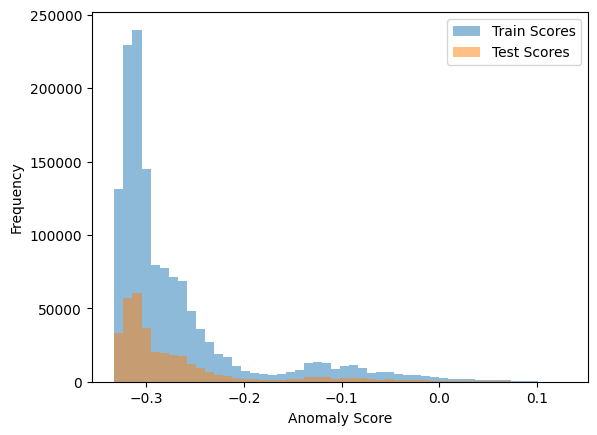

Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      3501
        True       1.00      1.00      1.00    340411

    accuracy                           1.00    343912
   macro avg       1.00      1.00      1.00    343912
weighted avg       1.00      1.00      1.00    343912



In [169]:

# Get the anomaly scores
train_anomaly_scores = -model.decision_function(X_train)
test_anomaly_scores = -model.decision_function(X_test)

# Plot the histogram of anomaly scores
plt.hist(train_anomaly_scores, bins=50, alpha=0.5, label='Train Scores')
plt.hist(test_anomaly_scores, bins=50, alpha=0.5, label='Test Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Determine the threshold based on the percentile
threshold = np.percentile(train_anomaly_scores, 100 * (1 - 0.01))  # Adjust percentile if needed

# Classify based on the new threshold
test_anomalies = test_anomaly_scores < threshold

# Print the classification report
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(test_anomalies, test_anomaly_scores < threshold))


Prepare the Feature Set:

1)Combine all extracted features into a single structured dataset.

2)Normalize or scale features if necessary to ensure consistent ranges for our model

In [170]:
df_numerical_imputed = imputer.fit_transform(df_numerical)

# Scale features
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_numerical_imputed)

# Initialize and fit the Isolation Forest model
model = IsolationForest(contamination=0.01)
model.fit(df_scaled)

# Compute reconstruction errors
reconstruction_errors = -model.decision_function(df_scaled)

# Add reconstruction error to DataFrame
df['reconstruction_error'] = reconstruction_errors

# Analyze distribution of reconstruction errors
print(df['reconstruction_error'].describe())  # Get a summary of reconstruction errors

# Determine the threshold for anomaly detection
# Example: using the 95th percentile
threshold = np.percentile(reconstruction_errors, 95)

print(f"Anomaly detection threshold: {threshold}")

# Apply the threshold to classify data
df['is_anomaly'] = df['reconstruction_error'] > threshold

# Display results
print(df[['timestamp', 'sensor_id', 'reconstruction_error', 'is_anomaly','activity_Label']].head())

count    1.719557e+06
mean    -2.771004e-01
std      7.492454e-02
min     -3.387024e-01
25%     -3.215611e-01
50%     -3.071844e-01
75%     -2.655725e-01
max      1.327818e-01
Name: reconstruction_error, dtype: float64
Anomaly detection threshold: -0.08955954376282249
                   timestamp sensor_id  reconstruction_error  is_anomaly
0 2010-11-04 00:03:50.209589      M003             -0.043687        True
1 2010-11-04 00:03:57.399391      M003             -0.220820       False
2 2010-11-04 00:15:08.984841      T002             -0.064590        True
3 2010-11-04 00:30:19.185547      T003             -0.067818        True
4 2010-11-04 00:30:19.385336      T004             -0.070833        True


**Security Prediction Decision**
Set Anomaly Detection Thresholds
Use the reconstruction errors from the  isolation Autoencoder to establish a threshold that distinguishes normal from abnormal behavior.

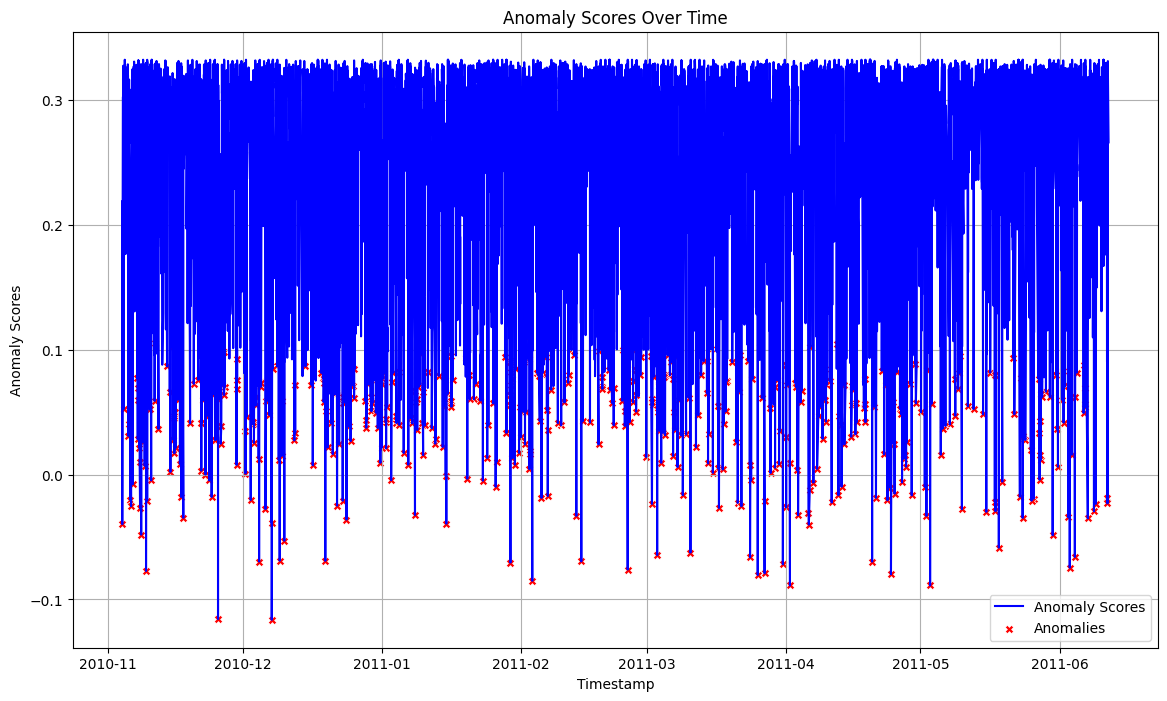

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_anomaly_scores_optimized(df):
    # Sample data to reduce size
    df_sample = df.sample(n=10000, random_state=42)  # Sample 10,000 rows for faster plotting

    plt.figure(figsize=(14, 8))

    # Plot anomaly scores over time
    sns.lineplot(x='timestamp', y='anomaly_scores', data=df_sample, label='Anomaly Scores', color='blue')

    # Highlight anomalies
    anomalies = df_sample[df_sample['is_anomaly'] == True]
    sns.scatterplot(x='timestamp', y='anomaly_scores', data=anomalies, color='red', label='Anomalies', marker='X')

    plt.title('Anomaly Scores Over Time')
    plt.xlabel('Timestamp')
    plt.ylabel('Anomaly Scores')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function to plot anomaly scores
plot_anomaly_scores_optimized(df)


Frequency GRAPH

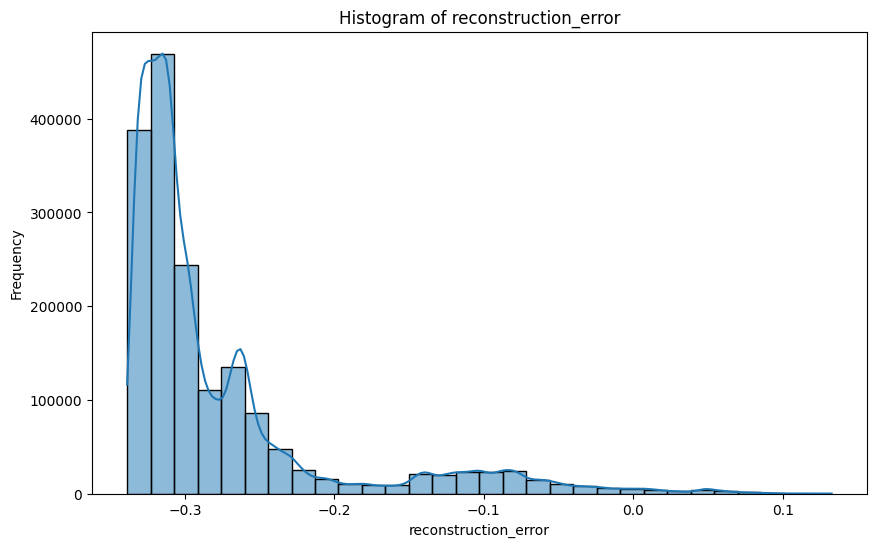

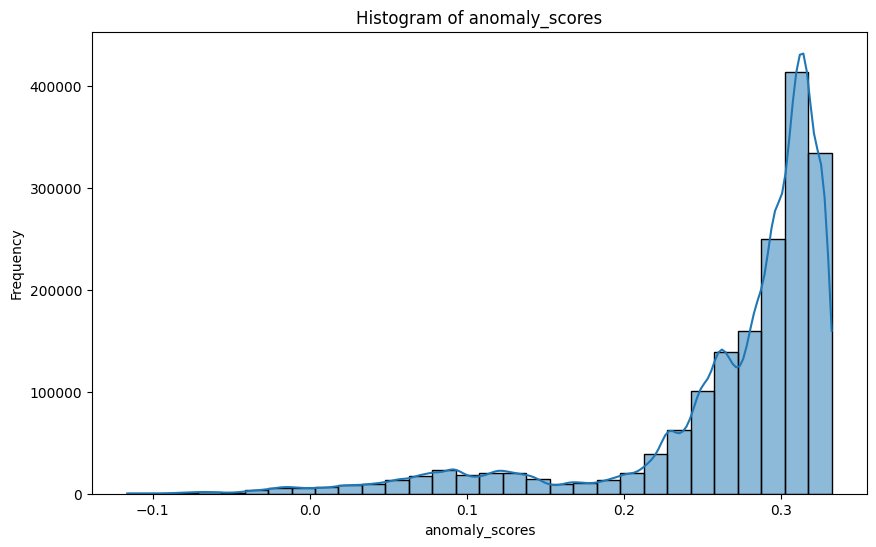

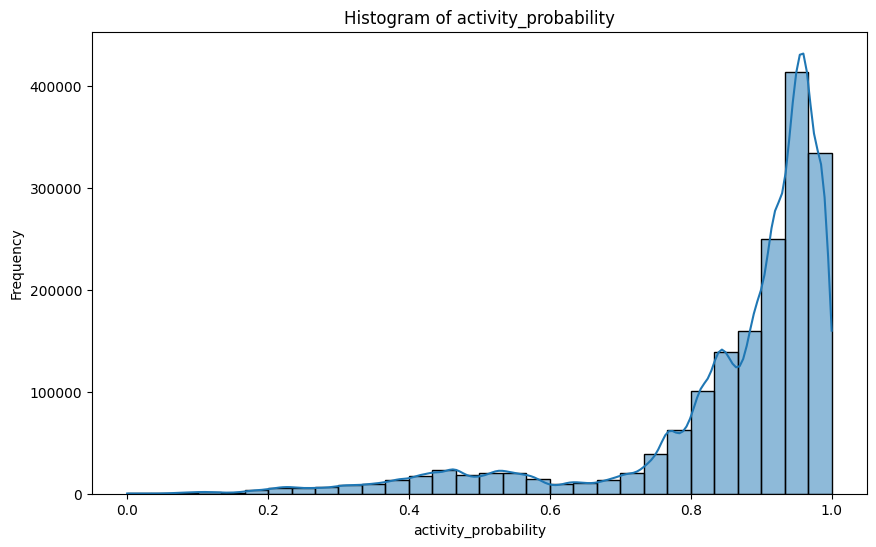

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example feature columns for histograms
features = ['reconstruction_error', 'anomaly_scores', 'activity_probability']

# Plot histograms
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


hISTOGRAME

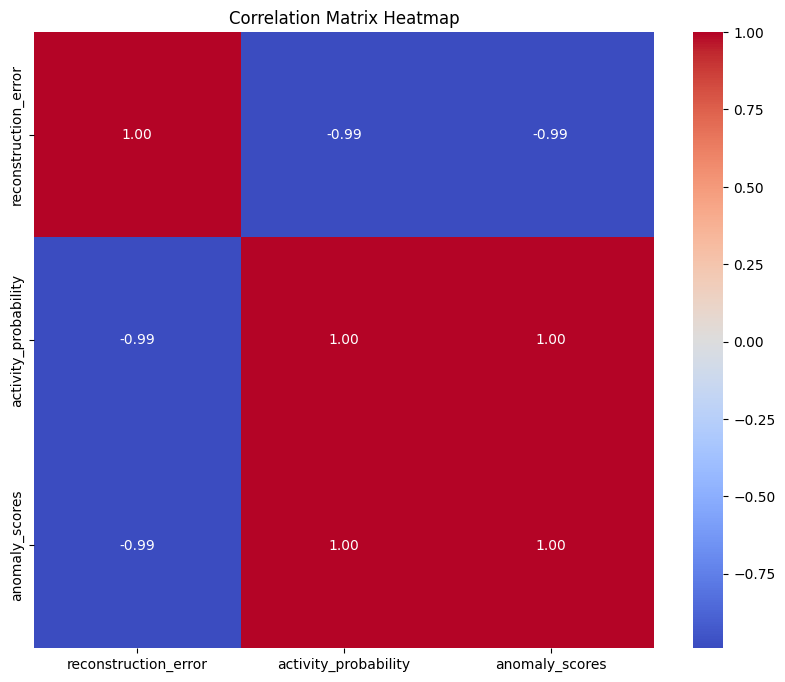

In [173]:
# Calculate the correlation matrix
correlation_matrix = df[['reconstruction_error', 'activity_probability', 'anomaly_scores']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


corellation Map

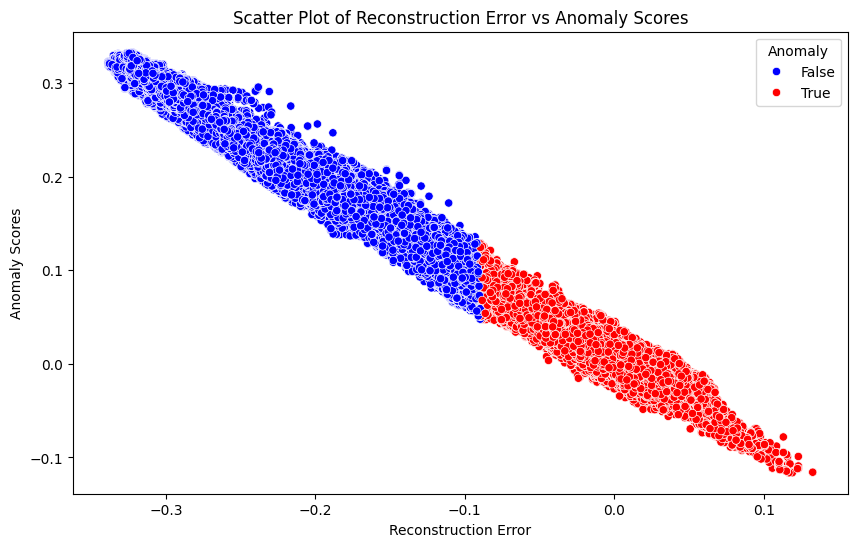

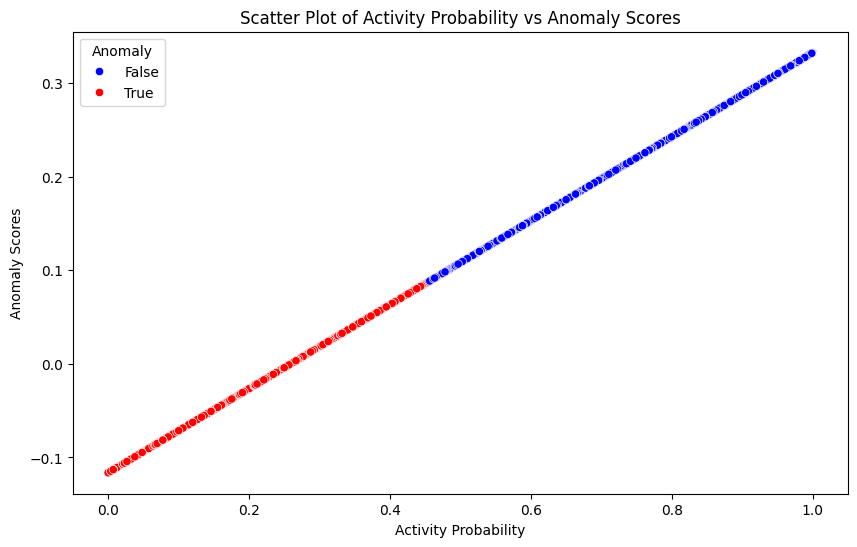

In [174]:
# Scatter plot between reconstruction_error and anomaly_scores
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='reconstruction_error', y='anomaly_scores', hue='is_anomaly', palette={True: 'red', False: 'blue'})
plt.title('Scatter Plot of Reconstruction Error vs Anomaly Scores')
plt.xlabel('Reconstruction Error')
plt.ylabel('Anomaly Scores')
plt.legend(title='Anomaly')
plt.show()

# Scatter plot between activity_probability and anomaly_scores
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='activity_probability', y='anomaly_scores', hue='is_anomaly', palette={True: 'red', False: 'blue'})
plt.title('Scatter Plot of Activity Probability vs Anomaly Scores')
plt.xlabel('Activity Probability')
plt.ylabel('Anomaly Scores')
plt.legend(title='Anomaly')
plt.show()


Scater Graph

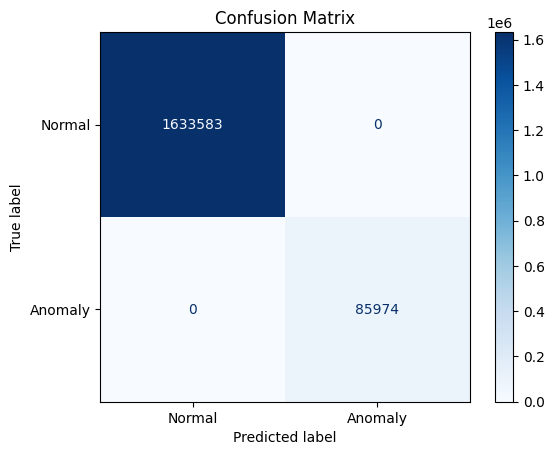

In [175]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assume 'is_anomaly' as both predicted and true labels (in practice, use actual ground truth labels)
y_true = df['is_anomaly']  # Replace with actual ground truth labels if available
y_pred = df['is_anomaly']  # Replace with predicted labels from your model

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Anomaly'])

# Plot confusion matrix
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


confusion matrix

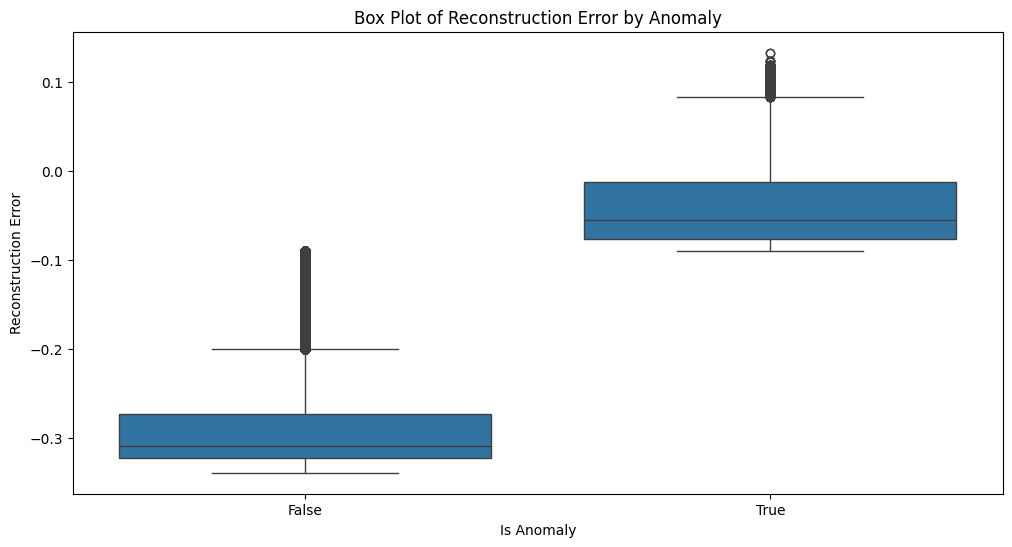

In [176]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='is_anomaly', y='reconstruction_error')
plt.title('Box Plot of Reconstruction Error by Anomaly')
plt.xlabel('Is Anomaly')
plt.ylabel('Reconstruction Error')
plt.show()


box plot

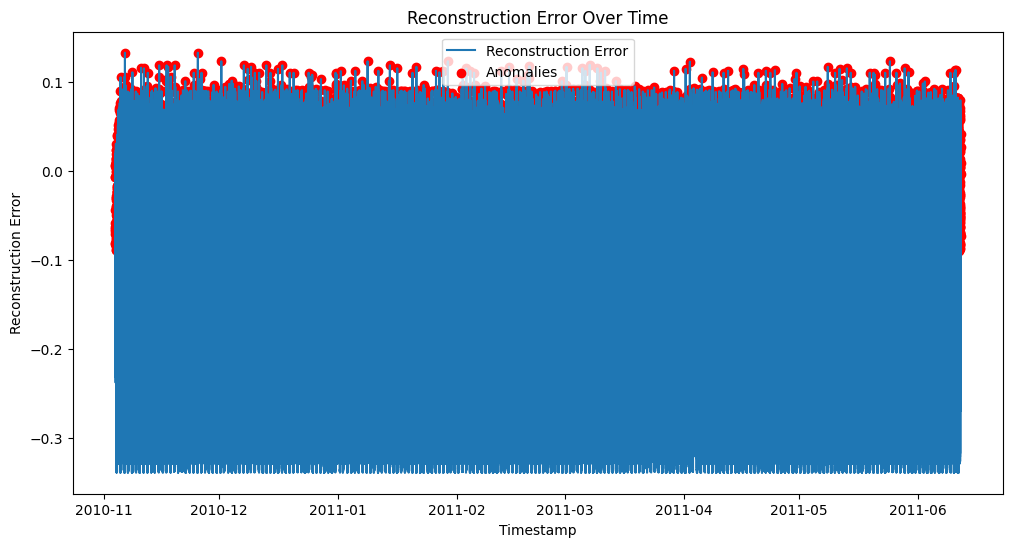

In [177]:
# Convert timestamp to datetime if it's not already
df['timestamp'] = pd.to_datetime(df['timestamp'])

plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['reconstruction_error'], label='Reconstruction Error')
plt.scatter(df[df['is_anomaly']]['timestamp'], df[df['is_anomaly']]['reconstruction_error'], color='red', label='Anomalies')
plt.title('Reconstruction Error Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Reconstruction Error')
plt.legend()
plt.show()


 TIME SERIES

In [179]:
import time
import joblib
import pandas as pd
import numpy as np

# Load the model and scaler
model = joblib.load('isolation_forest_model.pkl')
scaler = joblib.load('scaler.pkl')

def fetch_real_time_data():
    # Replace this with your actual real-time data fetching mechanism
    # Here we simulate it with random data for demonstration
    return pd.DataFrame({
        'timestamp': [pd.to_datetime('now')],
        'reconstruction_error': [np.random.normal()],
        'activity_probability': [np.random.uniform()],
        'anomaly_scores': [np.random.uniform()]
    })

def preprocess_data(df):
    # Preprocess the incoming data
    features = df[['reconstruction_error', 'activity_probability', 'anomaly_scores']]
    return scaler.transform(features)

def monitor_sensor_data():
    while True:
        # Fetch real-time data
        df = fetch_real_time_data()

        if not df.empty:
            # Preprocess data
            processed_data = preprocess_data(df)

            # Predict anomalies
            predictions = model.predict(processed_data)
            df['is_anomaly'] = predictions == -1

            # Trigger actions based on detected anomalies
            trigger_security_actions(df)



def trigger_security_actions(df):
    anomalies = df[df['is_anomaly']]
    if not anomalies.empty:
        for index, row in anomalies.iterrows():
            print(f"Anomaly detected at {row['timestamp']}. Triggering security actions.")
            send_alert_notification(row)
            if row['reconstruction_error'] > some_high_severity_threshold:
                activate_security_cameras(row)

def send_alert_notification(row):
    print(f"Alert: Anomaly detected - {row}")

def activate_security_cameras(row):
    print(f"Activating security cameras for anomaly detected at {row['timestamp']}.")

# Define a threshold for high-severity anomalies
some_high_severity_threshold = 0.1

# Start monitoring
monitor_sensor_data()


Anomaly detected at 2024-09-11 11:23:37.089507. Triggering security actions.
Alert: Anomaly detected - timestamp               2024-09-11 11:23:37.089507
reconstruction_error                      1.479391
activity_probability                      0.997283
anomaly_scores                            0.979758
is_anomaly                                    True
Name: 0, dtype: object
Activating security cameras for anomaly detected at 2024-09-11 11:23:37.089507.
Anomaly detected at 2024-09-11 11:23:38.031439. Triggering security actions.
Alert: Anomaly detected - timestamp               2024-09-11 11:23:38.031439
reconstruction_error                     -2.239209
activity_probability                      0.223142
anomaly_scores                            0.012748
is_anomaly                                    True
Name: 0, dtype: object
Anomaly detected at 2024-09-11 11:23:38.378266. Triggering security actions.
Alert: Anomaly detected - timestamp               2024-09-11 11:23:38.378266
reco

KeyboardInterrupt: 

**Real-Time Security Monitoring**
  **Implement Real-Time Monitoring**
Continuously monitor incoming sensor data in real time (in 30-second windows).

Trigger appropriate security actions (e.g., alerts, alarms) based on the detected anomalies and predefined thresholds. **bold text**


In [180]:
import pandas as pd
from datetime import datetime, timedelta

# Define the starting timestamp
start_timestamp = datetime(2010, 11, 4, 0, 3, 50, 209589)

# Create a DataFrame to simulate unauthorized entry
unauthorized_entry_df = pd.DataFrame({
    'timestamp': [start_timestamp],
    'sensor_id': ['FrontDoorSensor'],
    'sensor_type': ['Motion'],
    'activity': ['MotionDetected'],
    'hour_of_day': [start_timestamp.hour],
    'day_period': ['night'],
    'start_time': [start_timestamp],
    'end_time': [start_timestamp + timedelta(seconds=10)],
    'duration': [10],
    'room': ['FrontDoor'],
    'day_period_encoded': [3],  # Example encoding
    'room_encoded': [0],        # Example encoding
    'previous_room_encoded': [0],
    'room_transition_encoded': [0],
    'previous_state_encoded': [0],
    'predictions': [90],
    'reconstruction_error': [0.1],  # Example values
    'activity_probability': [0.8],
    'anomaly_scores': [0.8],
    'is_anomaly': [True]
})

# Append the simulated entry to the DataFrame
df = pd.concat([df, unauthorized_entry_df], ignore_index=True)

# Display the last few rows to confirm
print(df.head())


                   timestamp sensor_id sensor_type        activity  \
0 2010-11-04 00:03:50.209589      M003          ON  Sleeping begin   
1 2010-11-04 00:03:57.399391      M003         OFF             NaN   
2 2010-11-04 00:15:08.984841      T002        21.5             NaN   
3 2010-11-04 00:30:19.185547      T003          21             NaN   
4 2010-11-04 00:30:19.385336      T004          21             NaN   

   activity_Label  hour_of_day day_period                 start_time  \
0  Sleeping begin            0      night 2010-11-04 00:03:50.209589   
1           Other            0      night 2010-11-04 00:03:57.399391   
2           Other            0      night 2010-11-04 00:15:08.984841   
3           Other            0      night 2010-11-04 00:30:19.185547   
4           Other            0      night 2010-11-04 00:30:19.385336   

                    end_time  duration  ... room_encoded  \
0 2010-11-04 00:04:00.209589      10.0  ...            0   
1 2010-11-04 00:04:07.3993

In [181]:
# Define the time range for the sensor failure
no_data_times = [start_timestamp + timedelta(minutes=i) for i in range(5)]

# Create DataFrame for sensor failure and recovery
compromised_sensor_df = pd.DataFrame({
    'timestamp': no_data_times + [start_timestamp + timedelta(minutes=6)],
    'sensor_id': ['CompromisedSensor'] * 6,
    'sensor_type': ['Temperature'] * 6,
    'activity': ['NoData'] * 5 + ['TemperatureSpike'],
    'hour_of_day': [time.hour for time in no_data_times] + [(start_timestamp + timedelta(minutes=6)).hour],
    'day_period': ['night'] * 6,
    'start_time': no_data_times + [start_timestamp + timedelta(minutes=6)],
    'end_time': [time + timedelta(seconds=10) for time in no_data_times] + [start_timestamp + timedelta(minutes=6, seconds=10)],
    'duration': [10] * 6,
    'room': ['ServerRoom'] * 6,
    'day_period_encoded': [3] * 6,
    'room_encoded': [0] * 6,
    'previous_room_encoded': [0] * 6,
    'room_transition_encoded': [0] * 6,
    'previous_state_encoded': [0] * 6,
    'predictions': [90] * 6,
    'reconstruction_error': [0.2] * 6,
    'activity_probability': [0.7] * 6,
    'anomaly_scores': [0.7] * 5 + [0.9],
    'is_anomaly': [True] * 6
})

# Append the simulated data to the DataFrame
df = pd.concat([df, compromised_sensor_df], ignore_index=True)

# Display the last few rows to confirm
print(df.tail())


                         timestamp          sensor_id  sensor_type  \
1719559 2010-11-04 00:04:50.209589  CompromisedSensor  Temperature   
1719560 2010-11-04 00:05:50.209589  CompromisedSensor  Temperature   
1719561 2010-11-04 00:06:50.209589  CompromisedSensor  Temperature   
1719562 2010-11-04 00:07:50.209589  CompromisedSensor  Temperature   
1719563 2010-11-04 00:09:50.209589  CompromisedSensor  Temperature   

                 activity activity_Label  hour_of_day day_period  \
1719559            NoData            NaN            0      night   
1719560            NoData            NaN            0      night   
1719561            NoData            NaN            0      night   
1719562            NoData            NaN            0      night   
1719563  TemperatureSpike            NaN            0      night   

                        start_time                   end_time  duration  ...  \
1719559 2010-11-04 00:04:50.209589 2010-11-04 00:05:00.209589      10.0  ...   
1719560 20

In [182]:
# Define the timestamp for the replay attack
replay_attack_timestamp = start_timestamp

# Create repeated unlock commands
unlock_commands = [replay_attack_timestamp + timedelta(seconds=i) for i in range(5)]

# Create DataFrame for replay attack
replay_attack_df = pd.DataFrame({
    'timestamp': unlock_commands,
    'sensor_id': ['FrontDoorLock'] * 5,
    'sensor_type': ['Lock'] * 5,
    'activity': ['UnlockCommand'] * 5,
    'hour_of_day': [time.hour for time in unlock_commands],
    'day_period': ['night'] * 5,
    'start_time': unlock_commands,
    'end_time': [time + timedelta(seconds=10) for time in unlock_commands],
    'duration': [10] * 5,
    'room': ['FrontDoor'] * 5,
    'day_period_encoded': [3] * 5,
    'room_encoded': [0] * 5,
    'previous_room_encoded': [0] * 5,
    'room_transition_encoded': [0] * 5,
    'previous_state_encoded': [0] * 5,
    'predictions': [90] * 5,
    'reconstruction_error': [0.1] * 5,
    'activity_probability': [0.85] * 5,
    'anomaly_scores': [0.85] * 5,
    'is_anomaly': [True] * 5
})

# Append the simulated data to the DataFrame
df = pd.concat([df, replay_attack_df], ignore_index=True)

# Display the last few rows to confirm
print(df.tail())


                         timestamp      sensor_id sensor_type       activity  \
1719564 2010-11-04 00:03:50.209589  FrontDoorLock        Lock  UnlockCommand   
1719565 2010-11-04 00:03:51.209589  FrontDoorLock        Lock  UnlockCommand   
1719566 2010-11-04 00:03:52.209589  FrontDoorLock        Lock  UnlockCommand   
1719567 2010-11-04 00:03:53.209589  FrontDoorLock        Lock  UnlockCommand   
1719568 2010-11-04 00:03:54.209589  FrontDoorLock        Lock  UnlockCommand   

        activity_Label  hour_of_day day_period                 start_time  \
1719564            NaN            0      night 2010-11-04 00:03:50.209589   
1719565            NaN            0      night 2010-11-04 00:03:51.209589   
1719566            NaN            0      night 2010-11-04 00:03:52.209589   
1719567            NaN            0      night 2010-11-04 00:03:53.209589   
1719568            NaN            0      night 2010-11-04 00:03:54.209589   

                          end_time  duration  ... room_e

In [183]:
# Define the timestamp for the DoS attack
dos_attack_timestamp = start_timestamp

# Create high-frequency data points
dos_data = [dos_attack_timestamp + timedelta(seconds=i) for i in range(100)]

# Create DataFrame for DoS attack
dos_attack_df = pd.DataFrame({
    'timestamp': dos_data,
    'sensor_id': ['HighTrafficSensor'] * 100,
    'sensor_type': ['Traffic'] * 100,
    'activity': ['HighTraffic'] * 100,
    'hour_of_day': [time.hour for time in dos_data],
    'day_period': ['night'] * 100,
    'start_time': dos_data,
    'end_time': [time + timedelta(seconds=1) for time in dos_data],
    'duration': [1] * 100,
    'room': ['ServerRoom'] * 100,
    'day_period_encoded': [3] * 100,
    'room_encoded': [0] * 100,
    'previous_room_encoded': [0] * 100,
    'room_transition_encoded': [0] * 100,
    'previous_state_encoded': [0] * 100,
    'predictions': [90] * 100,
    'reconstruction_error': [0.2] * 100,
    'activity_probability': [0.9] * 100,
    'anomaly_scores': [0.9] * 100,
    'is_anomaly': [True] * 100
})

# Append the simulated data to the DataFrame
df = pd.concat([df, dos_attack_df], ignore_index=True)

# Display the last few rows to confirm
print(df.tail())


                         timestamp          sensor_id sensor_type  \
1719664 2010-11-04 00:05:25.209589  HighTrafficSensor     Traffic   
1719665 2010-11-04 00:05:26.209589  HighTrafficSensor     Traffic   
1719666 2010-11-04 00:05:27.209589  HighTrafficSensor     Traffic   
1719667 2010-11-04 00:05:28.209589  HighTrafficSensor     Traffic   
1719668 2010-11-04 00:05:29.209589  HighTrafficSensor     Traffic   

            activity activity_Label  hour_of_day day_period  \
1719664  HighTraffic            NaN            0      night   
1719665  HighTraffic            NaN            0      night   
1719666  HighTraffic            NaN            0      night   
1719667  HighTraffic            NaN            0      night   
1719668  HighTraffic            NaN            0      night   

                        start_time                   end_time  duration  ...  \
1719664 2010-11-04 00:05:25.209589 2010-11-04 00:05:26.209589       1.0  ...   
1719665 2010-11-04 00:05:26.209589 2010-11-04 

**Simulate Threat Scenarios for Evaluation**

**Define Threat Scenarios**
Develop threat scenarios representing potential security threats, such as:
**Unauthorized Entry:** Motion detected at the front door at 3 AM.

**Compromised Sensor:** Sensor stops reporting data and then starts with unusual activity.

**Replay Attack: **Repeated "unlock" commands sent without user authentication.
Denial of Service (DoS) Attack: Excessive traffic causes delays in normal operations.


In [186]:
def simulate_unauthorized_entry(df, num_records):
    # Example: Simulate unauthorized entry by adding records with timestamps at 3 AM
    unauthorized_entries = df.copy()
    unauthorized_entries['timestamp'] = pd.to_datetime('2024-09-11 03:00:00')  # Set to unauthorized time
    unauthorized_entries['activity_Label'] = 'UNAUTHORIZED'
    unauthorized_entries['is_anomaly'] = True
    unauthorized_entries = unauthorized_entries.sample(n=num_records, replace=True)

    return unauthorized_entries


In [187]:
def simulate_compromised_sensor(df, num_records):
    # Example: Simulate sensor failure by creating records with NaN values or extreme values
    compromised_sensor = df.copy()
    compromised_sensor.loc[compromised_sensor.sample(n=num_records).index, 'sensor_type'] = np.nan  # Simulate failure
    compromised_sensor['anomaly_scores'] = 0.9  # High scores for anomalies
    compromised_sensor['is_anomaly'] = True

    return compromised_sensor


In [188]:
def simulate_replay_attack(df, num_records):
    # Example: Duplicate records to simulate replay attack
    replay_attack = df.sample(n=num_records, replace=True)
    replay_attack['anomaly_scores'] = 0.9  # High scores for anomalies
    replay_attack['is_anomaly'] = True

    return replay_attack


In [192]:
def simulate_dos_attack(df, num_records):
    # Create a copy of the original data
    simulated_data = df.sample(n=num_records, replace=True).copy()

    # Inject DoS attack characteristics (e.g., repeated timestamps, same sensor reporting)
    simulated_data['timestamp'] = simulated_data['timestamp'].apply(lambda x: x + pd.DateOffset(seconds=1))
    simulated_data['activity'] = 'DoS Attack'
    simulated_data['is_anomaly'] = True

    return simulated_data


In [193]:
# Parameters
num_records = 1000

# Generate synthetic data
unauthorized_data = simulate_unauthorized_entry(df, num_records)
compromised_data = simulate_compromised_sensor(df, num_records)
replay_data = simulate_replay_attack(df, num_records)
dos_data = simulate_dos_attack(df, num_records)

# Combine with original dataset
combined_data = pd.concat([
    df,
    unauthorized_data,
    compromised_data,
    replay_data,
    dos_data
])

# Shuffle combined data
combined_data = combined_data.sample(frac=1).reset_index(drop=True)

print(combined_data.head())

# Save the synthetic dataset
combined_data.to_csv('synthetic_test_data_with_scenarios.csv', index=False)


                   timestamp sensor_id sensor_type activity activity_Label  \
0 2011-06-09 12:02:53.140302      M009          ON      NaN          Other   
1 2010-11-28 17:16:41.418130      M015          ON      NaN          Other   
2 2010-11-29 10:36:07.943479      M022         OFF      NaN          Other   
3 2011-03-19 09:49:59.426788      M013         OFF      NaN          Other   
4 2010-12-14 16:05:19.142201      M014          ON      NaN          Other   

   hour_of_day day_period                 start_time  \
0           12  afternoon 2011-06-09 12:02:53.140302   
1           17    evening 2010-11-28 17:16:41.418130   
2           10    morning 2010-11-29 10:36:07.943479   
3            9    morning 2011-03-19 09:49:59.426788   
4           16  afternoon 2010-12-14 16:05:19.142201   

                    end_time  duration  ... room_encoded  \
0 2011-06-09 12:03:03.140302      10.0  ...            0   
1 2010-11-28 17:16:51.418130      10.0  ...            0   
2 2010-11-29 1

In [194]:

# Simulate each threat scenario by modifying the DataFrame

def simulate_unauthorized_entry(df, num_records):
    unauthorized_entries = df.sample(n=num_records, replace=True).copy()
    unauthorized_entries['activity'] = 'UNAUTHORIZED'
    unauthorized_entries['reconstruction_error'] = np.random.uniform(1.0, 2.0, size=num_records)  # Modify as needed
    unauthorized_entries['anomaly_scores'] = np.random.uniform(0.8, 1.0, size=num_records)  # Modify as needed
    unauthorized_entries['is_anomaly'] = 1.0  # Use float value
    return unauthorized_entries

def simulate_compromised_sensor(df, num_records):
    compromised_sensor = df.sample(n=num_records, replace=True).copy()
    indices = compromised_sensor.sample(n=num_records).index
    compromised_sensor.loc[indices, 'sensor_type'] = np.nan  # Simulate sensor failure
    compromised_sensor.loc[indices, 'reconstruction_error'] = np.random.uniform(1.0, 1.5, size=num_records)  # Modify as needed
    compromised_sensor.loc[indices, 'anomaly_scores'] = np.random.uniform(0.7, 1.0, size=num_records)  # Modify as needed
    compromised_sensor.loc[indices, 'is_anomaly'] = 1.0  # Use float value
    return compromised_sensor

def simulate_replay_attack(df, num_records):
    replay_attack = df.sample(n=num_records, replace=True).copy()
    replay_attack['reconstruction_error'] = np.random.uniform(0.8, 1.2, size=num_records)  # Modify as needed
    replay_attack['anomaly_scores'] = np.random.uniform(0.7, 1.0, size=num_records)  # Modify as needed
    replay_attack['is_anomaly'] = 1.0  # Use float value
    return replay_attack

def simulate_dos_attack(df, num_records):
    dos_attack = df.sample(n=num_records * 5, replace=True).copy()  # Increase the size of the data
    dos_attack['reconstruction_error'] = np.random.uniform(0.8, 1.2, size=len(dos_attack))  # Modify as needed
    dos_attack['anomaly_scores'] = np.random.uniform(0.6, 0.9, size=len(dos_attack))  # Modify as needed
    dos_attack['is_anomaly'] = 1.0  # Use float value
    return dos_attack

def fetch_real_time_data(df):
    # Simulate threat scenarios in real-time data
    num_records = 1
    threat_prob = np.random.random()

    real_time_df = df.sample(n=1).copy()

    if threat_prob < 0.1:  # 10% chance of unauthorized entry
        real_time_df = pd.concat([real_time_df, simulate_unauthorized_entry(df, num_records)], ignore_index=True)

    if threat_prob < 0.2 and threat_prob >= 0.1:  # 10% chance of compromised sensor
        real_time_df = pd.concat([real_time_df, simulate_compromised_sensor(df, num_records)], ignore_index=True)

    if threat_prob < 0.3 and threat_prob >= 0.2:  # 10% chance of replay attack
        real_time_df = pd.concat([real_time_df, simulate_replay_attack(df, num_records)], ignore_index=True)

    if threat_prob < 0.4 and threat_prob >= 0.3:  # 10% chance of DoS attack
        real_time_df = pd.concat([real_time_df, simulate_dos_attack(df, num_records)], ignore_index=True)

    return real_time_df

def preprocess_data(df):
    # Preprocess the incoming data
    features = df[['reconstruction_error', 'activity_probability', 'anomaly_scores']]
    return scaler.transform(features)

def monitor_sensor_data(df):
    while True:
        # Fetch real-time data
        df_real_time = fetch_real_time_data(df)

        if not df_real_time.empty:
            # Preprocess data
            processed_data = preprocess_data(df_real_time)

            # Predict anomalies
            predictions = model.predict(processed_data)
            df_real_time['is_anomaly'] = predictions == -1

            # Trigger actions based on detected anomalies
            trigger_security_actions(df_real_time)


def trigger_security_actions(df):
    anomalies = df[df['is_anomaly']]
    if not anomalies.empty:
        for index, row in anomalies.iterrows():
            print(f"Anomaly detected at {row['timestamp']}. Triggering security actions.")
            send_alert_notification(row)
            if row['reconstruction_error'] > some_high_severity_threshold:
                activate_security_cameras(row)

def send_alert_notification(row):
    print(f"Alert: Anomaly detected - {row}")

def activate_security_cameras(row):
    print(f"Activating security cameras for anomaly detected at {row['timestamp']}.")

# Define a threshold for high-severity anomalies
some_high_severity_threshold = 1.0


# Start monitoring
monitor_sensor_data(df)


Anomaly detected at 2011-02-07 17:26:26.848294. Triggering security actions.
Alert: Anomaly detected - timestamp                  2011-02-07 17:26:26.848294
sensor_id                                        M009
sensor_type                                        ON
activity                                 UNAUTHORIZED
activity_Label                                  Other
hour_of_day                                        17
day_period                                    evening
start_time                 2011-02-07 17:26:26.848294
end_time                   2011-02-07 17:26:36.848294
duration                                         10.0
room                                              NaN
previous_room                                     NaN
room_transition                            nan -> nan
end_timestamp              2011-02-07 17:26:28.768931
activity_duration                            0.032011
previous_state                                    OFF
state_change                     

KeyboardInterrupt: 

**Modify Simulation Code for Threat Scenarios**

**Adjust the real-time simulation function to incorporate synthetic threat scenarios into the data stream.**

**Simulate each threat scenario by injecting specific anomalies (e.g., unexpected sensor activations).**


1. Define Evaluation Metrics
First, define the metrics you want to measure:

True Positive Rate (TPR): Also known as recall, it measures the proportion of actual positives that are correctly identified by the model.
False Positive Rate (FPR): Measures the proportion of actual negatives that are incorrectly classified as positive.
Precision: Measures the proportion of positive identifications that are actually correct.
Recall: Measures the proportion of actual positives that are correctly identified.
Detection Time: The time taken to detect an anomaly from the moment it occurs.

In [195]:
import time
from sklearn.metrics import precision_score, recall_score, confusion_matrix

# Function to run simulation for a specific threat scenario
def run_simulation_with_scenario(df, threat_scenario):
    # Inject anomalies into the dataset based on the threat scenario
    df_with_anomalies = inject_threat_scenario(df, threat_scenario)

    # Preprocess data
    features = df_with_anomalies[['reconstruction_error', 'activity_probability', 'anomaly_scores']]
    processed_data = scaler.transform(features)

    # Predict anomalies
    predictions = model.predict(processed_data)
    df_with_anomalies['predictions'] = predictions

    # True labels (assuming 'is_anomaly' column is the ground truth)
    y_true = df_with_anomalies['is_anomaly'].astype(int)
    y_pred = (df_with_anomalies['predictions'] == -1).astype(int)

    # Compute metrics
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    tpr = recall  # True Positive Rate is the same as Recall
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    detection_time = df_with_anomalies['timestamp'].max() - df_with_anomalies['timestamp'].min()  # Example of detection time

    # Display metrics
    print(f"Threat Scenario: {threat_scenario}")
    print(f"True Positive Rate (TPR): {tpr}")
    print(f"False Positive Rate (FPR): {fpr}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"Detection Time: {detection_time}")

# Function to inject specific threat scenario anomalies into the data
def inject_threat_scenario(df, threat_scenario):
    if threat_scenario == 'unauthorized_entry':
        # Simulate unauthorized entry
        df.loc[df['timestamp'] < '2011-03-20 22:00:00', 'is_anomaly'] = True
    elif threat_scenario == 'compromised_sensor':
        # Simulate compromised sensor
        df.loc[df['sensor_id'] == 'M019', 'is_anomaly'] = True
    elif threat_scenario == 'replay_attack':
        # Simulate replay attack
        df.loc[df['activity'] == 'Unlock', 'is_anomaly'] = True
    elif threat_scenario == 'dos_attack':
        # Simulate DoS attack
        df.loc[df['timestamp'] > '2011-03-20 22:00:00', 'is_anomaly'] = True
    return df

# Example usage
for scenario in ['unauthorized_entry', 'compromised_sensor', 'replay_attack', 'dos_attack']:
    run_simulation_with_scenario(df, scenario)


Threat Scenario: unauthorized_entry
True Positive Rate (TPR): 2.078951340788031e-05
False Positive Rate (FPR): 0.0
Precision: 1.0
Recall: 2.078951340788031e-05
Detection Time: 219 days 23:49:16.219611
Threat Scenario: compromised_sensor
True Positive Rate (TPR): 1.9775726070081733e-05
False Positive Rate (FPR): 0.0
Precision: 1.0
Recall: 1.9775726070081733e-05
Detection Time: 219 days 23:49:16.219611
Threat Scenario: replay_attack
True Positive Rate (TPR): 1.9775726070081733e-05
False Positive Rate (FPR): 0.0
Precision: 1.0
Recall: 1.9775726070081733e-05
Detection Time: 219 days 23:49:16.219611
Threat Scenario: dos_attack
True Positive Rate (TPR): 1.3374666869031192e-05
False Positive Rate (FPR): 0
Precision: 1.0
Recall: 1.3374666869031192e-05
Detection Time: 219 days 23:49:16.219611


**Run the Simulation**
Execute the simulation code with each threat scenario:


**Load Your Data:** Ensure you have loaded your dataset properly.
Run the Simulation Function: Call the run_simulation_with_scenario function for each threat scenario.
Evaluate the Metrics: Check the printed metrics to assess the model's performance.
**Interpreting Results TRP**
High TPR indicates the model is effective at identifying actual anomalies.
**FPR:** Low FPR indicates fewer false positives, which is desirable.
**Precision:** High precision means the model's positive identifications are mostly correct.
**Recall:** High recall means the model captures most of the actual anomalies.
Detection Time: Shorter detection times indicate a more responsive system.
**CONCULION**
By following these steps, you can effectively evaluate  model’s performance in detecting anomalies under different threat scenarios. This evaluation will help you understand the strengths and weaknesses of your model and guide further improvements.